In [1]:
from __future__ import print_function, division
from builtins import range

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import pandas as pd

In [12]:
# define number of trials and true conversion rates
NUM_TRIALS = 2001
BANDIT_PROBABILITIES = [.21, .25]

In [4]:
# initialize each bandit with uniform priors
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0
      
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return beta.rvs(self.a, self.b)
    
    def update(self, x):
        self.N += 1
        self.a = self.a + x
        self.b = self.b + 1 - x
#         self.b = self.b + self.N - x

In [5]:
def plot(bandits, trial):
    
    x = np.linspace(0,1,200)

    for i in range(len(bandits)):
# plot the distribution of each variant
        y = beta.pdf(x, bandits[i].a, bandits[i].b)
        plt.plot(x, y, label=f"real p: {bandits[i].p:.4f}, win rate = {bandits[i].a - 1}/{bandits[i].N}")
    plt.title(f"Variant distributions after {trial} trials")
    plt.legend()
    plt.show()

In [105]:
def expected_loss(bandits):
    from functools import reduce
 
    n=10000
    samples = [None, None]
    for i in range(len(bandits)):
# calculate the expected loss
        success = bandits[i].a - 1
        failure = bandits[i].N - (bandits[i].a - 1)
        if success > 0:
            samples[i] = beta.rvs(success, failure, size = n)
        
        if np.any(samples[0]) and np.any(samples[1]):
            sample_list = list(zip(samples[0],samples[1]))
    
            diff_list_A = map(lambda sample: np.max([sample[0] - sample[1], 0]), sample_list)
            sum_diff_A = reduce(lambda x,y: x+y, diff_list_A)
            EL_A = sum_diff_A/n
#             print(f"Expected loss of choosing variant A: {EL_A}")

            diff_list_B = map(lambda sample: np.max([sample[1] - sample[0], 0]), sample_list)
            sum_diff_B = reduce(lambda x,y: x+y, diff_list_B)
            EL_B = sum_diff_B/n
#             print(f"Expected loss of choosing variant B: {EL_B}")
        
    return EL_A, EL_B

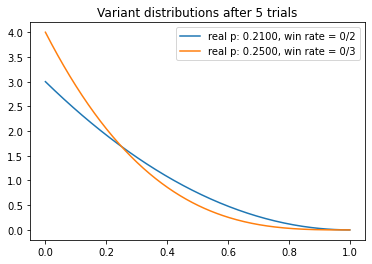

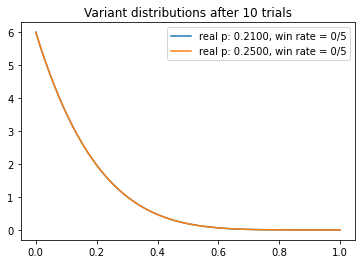

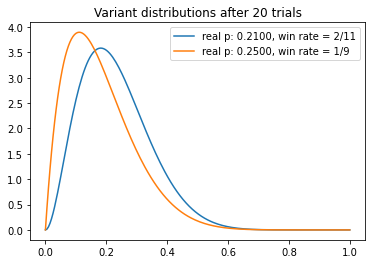

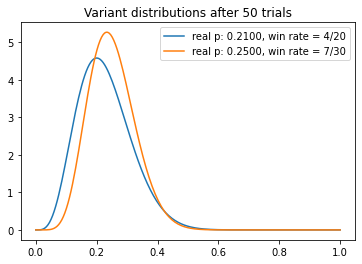

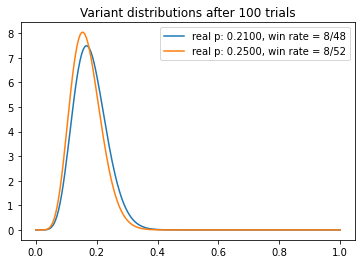

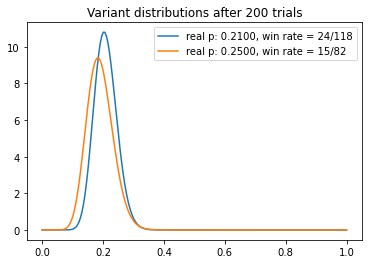

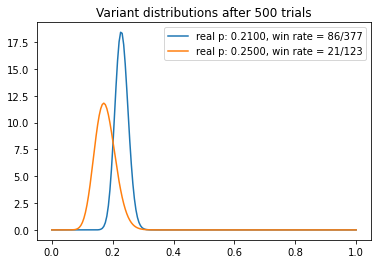

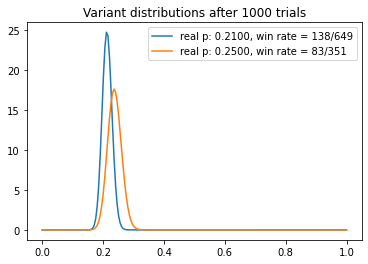

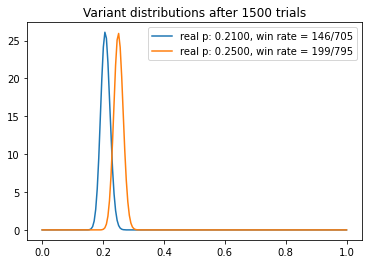

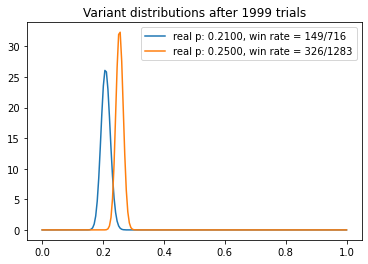

total reward earned 475.0
overall win rate: 0.23738130934532733
number of times each bandit selected: [716, 1285]


In [13]:
import pandas as pd

bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
# sample_points = range(100, 2000, 100)
rewards = np.zeros(NUM_TRIALS)

A = []
B = []

for k in range(NUM_TRIALS):
    sample = [b.sample() for b in bandits]

    if k in sample_points:
        plot(bandits, k)
#         A_loss, B_loss = expected_loss(bandits)
#         A.append(A_loss)
#         B.append(B_loss)

    j = np.argmax(sample)

    x = bandits[j].pull()

    rewards[k]= x

    bandits[j].update(x)

print("total reward earned", rewards.sum())
print("overall win rate:", rewards.sum()/NUM_TRIALS)
print("number of times each bandit selected:", [b.N for b in bandits])
# print(A)
# print(B)

# import seaborn as sns
# import matplotlib.pyplot as plt

# zipped = list(zip(sample_points, A, B))
# df = pd.DataFrame(zipped, columns=['Trials', 'Variant_A', 'Variant_B'])
# melted_df = pd.melt(df, id_vars=['Trials'], value_vars=['Variant_A', 'Variant_B'], var_name= 'Variant', value_name='Expected Loss')
 
# fig, ax1 = plt.subplots(figsize=(10, 5))

# sns.lineplot(x='Trials', y='Expected Loss', hue = 'Variant', data=melted_df, ax=ax1)
# sns.despine(fig)
# plt.title('Expected Loss over Time ', size = 18)
# plt.ylabel('Expected Loss')
# plt.xlabel('Number of Trials')

In [8]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

sample_points = [0, 5, 10, 20, 50, 100, 200, 500]
rewards = np.zeros(NUM_TRIALS)

variant = []
conversion = []

for i in range(NUM_TRIALS):
    sample = [b.sample() for b in bandits]
    j = np.argmax(sample)
    
#     if i in sample_points:
#         plot(bandits, i)
    
    x = bandits[j].pull()
    
    rewards[i]= x
    
    if j == 0:
        variant.append('control')
        conversion.append(x)
    else:
        variant.append('test')
        conversion.append(x)
    
    bandits[j].update(x)
    
# print("total reward earned", rewards.sum())
# print("overall win rate:", rewards.sum()/NUM_TRIALS)
# print("number of times each bandit selected:", [b.N for b in bandits])
zipped = list(zip(variant, conversion))
df = pd.DataFrame(zipped, columns=['variant', 'conversion'])
summary = df.groupby('variant')[['variant','conversion']]\
            .agg({'variant': 'count', 'conversion':'sum'})\
            .rename(columns = {'variant':'approved', 'conversion':'bound'})

summary['conversion_rate'] = summary['bound']/summary['approved']

conv_test = BinaryDataTest()

control_variant_conv = df['conversion'][(df.variant == 'control')].values
test_variant_conv = df['conversion'][df.variant == 'test'].values

conv_test.add_variant_data("control", control_variant_conv)
conv_test.add_variant_data("test", test_variant_conv)

summary = conv_test.evaluate()
type(summary)
# conv_test.evaluate()[1]['variant']

NameError: name 'BinaryDataTest' is not defined

In [36]:
from bayesian_testing.experiments import BinaryDataTest

conv_test = BinaryDataTest()

control_variant_conv = df['conversion'][(df.variant == 'control')].values
test_variant_conv = df['conversion'][df.variant == 'test'].values

conv_test.add_variant_data("control", control_variant_conv)
conv_test.add_variant_data("test", test_variant_conv)

conv_test.evaluate()

[{'variant': 'control',
  'totals': 162,
  'positives': 30,
  'positive_rate': 0.18519,
  'posterior_mean': 0.18712,
  'prob_being_best': 0.1719,
  'expected_loss': 0.0390889},
 {'variant': 'test',
  'totals': 338,
  'positives': 75,
  'positive_rate': 0.22189,
  'posterior_mean': 0.22271,
  'prob_being_best': 0.8281,
  'expected_loss': 0.0036716}]

In [14]:
import pandas as pd
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

# rewards = np.zeros(100)
variant = []
conversion = []

for i in range(100):

    sample = [b.sample() for b in bandits]

    j = np.argmax(sample)
#     print(j)
    
    x = bandits[j].pull()
#     print(x)
    
    if j == 0:
        variant.append('control')
        conversion.append(x)
    else:
        variant.append('test')
        conversion.append(x)
    
#     print(rewards)
    
    bandits[j].update(x)

    
# print("total reward earned", rewards.sum())
# print("overall win rate:", rewards.sum()/NUM_TRIALS)
# print("number of times each bandit selected:", [b.N for b in bandits])
zipped = list(zip(variant, conversion))
df = pd.DataFrame(zipped, columns=['Varian', 'Conversion'])

print(df)


     Varian  Conversion
0   control       False
1      test       False
2   control       False
3      test       False
4      test       False
..      ...         ...
95     test       False
96  control       False
97     test        True
98     test       False
99     test       False

[100 rows x 2 columns]


In [10]:
import numpy as np

for NUM_TRIALS in [500, 600, 700, 800, 900, 1000]:
    winner = np.zeros(10000)
    
    for k in range(10000):
        
        bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
        test = 0
        cont = 0
        variant = np.zeros(NUM_TRIALS)
        control = np.zeros(NUM_TRIALS)

        for i in range(NUM_TRIALS):
            sample = [b.sample() for b in bandits]
            j = np.argmax(sample)

            x = bandits[j].pull()

            if j == 0:
                cont+=1
                control[i] = x
            else:
                test+=1
                variant[i] = x

            bandits[j].update(x)

        if cont == 0:
            winner[k] = 1
        elif sum(variant)/test > sum(control)/cont:
            winner[k] = 1


    prob_to_win = sum(winner)/len(winner)
    print(NUM_TRIALS)
    print(prob_to_win)

500
0.6854
600
0.7084
700
0.7174
800
0.7385
900
0.7434
1000
0.7596
